## libs

In [672]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from bokeh.plotting import figure, show, ColumnDataSource, output_file
from bokeh.models import HoverTool

## initialization

In [701]:
CLUSTER = 'NGC_6405'
STARS_DIRECTORY = Path('../sessions/')
i = 0

In [702]:
def read_file(filename):
    df = pd.read_csv(filename, delimiter='\\s+')
    df = df.apply(pd.to_numeric, errors='coerce')
    df.dropna(subset = ['phot_g_mean_mag','bp_rp'], inplace = True)
    return df

# function for making CMD 
def plot_CMD (data):
    source = ColumnDataSource(
            data=dict(
                x=data['bp_rp'],
                y=data['phot_g_mean_mag'],
            )
        )
    hover = HoverTool(
            tooltips=[
                ("index", "$index"),
                ("(x,y)", "($x, $y)"),
            ]
        )
    output_file(f'CMD.html')
    
    p = figure(plot_width=1200, plot_height=1200, tools=[hover],x_range = (-0.5, 3.5), y_range = (22, 4))
    p.circle('x', 'y', size=5, source=source, color = "black", alpha = 0.65)
    return show(p)

def color_negative_red(val):
    color = 'red' if val >0.3 else 'black'
    return 'color: %s' % color

In [706]:
cluster_data = read_file(STARS_DIRECTORY / f'{CLUSTER}_selected')

In [707]:
#plot_CMD(cluster_data)

# distance from 'central parameters' 

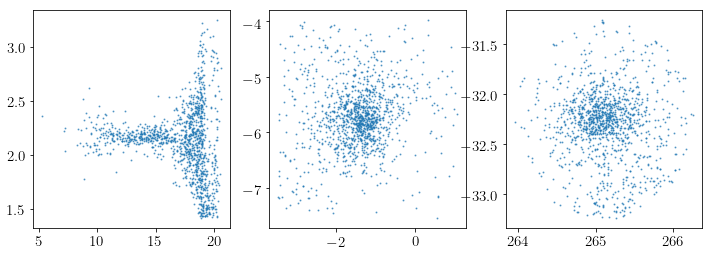

In [708]:
fig, axes = plt.subplots(figsize=(12, 4), ncols=3, nrows=1)
axes[0].scatter(cluster_data['phot_g_mean_mag'], cluster_data['parallax'], s=1, alpha=0.6)
axes[1].scatter(cluster_data['pmra'], cluster_data['pmdec'], s=1, alpha=0.6)
axes[2].scatter(cluster_data['ra'], cluster_data['dec'], s=1, alpha=0.6)

central parameters

In [2]:
PARALLAX = 2.15
PMRA = -1.35
PMDEC = -5.8
RA = 265.08
DEC = -32.25

parallax_radius = 0.25
pm_radius = 0.5
coord_radius = 0.5

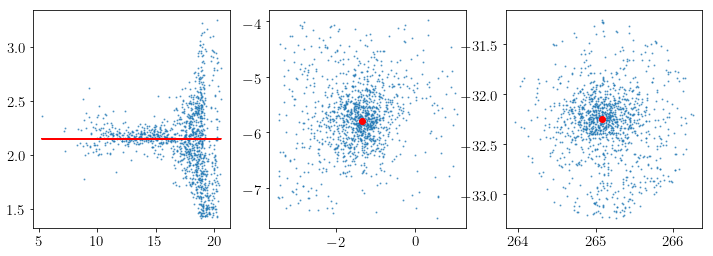

In [718]:
fig, axes = plt.subplots(figsize=(12, 4), ncols=3, nrows=1)
axes[0].scatter(cluster_data['phot_g_mean_mag'], cluster_data['parallax'], s=1, alpha=0.6)
axes[0].plot(cluster_data['phot_g_mean_mag'], np.full(cluster_data['phot_g_mean_mag'].shape,PARALLAX),c='red')

axes[1].scatter(cluster_data['pmra'], cluster_data['pmdec'], s=1, alpha=0.6)
axes[1].scatter((PMRA), (PMDEC), c='red')

axes[2].scatter(cluster_data['ra'], cluster_data['dec'], s=1, alpha=0.6)
axes[2].scatter(RA, DEC, c='red')

In [719]:
stars_doubt = cluster_data.copy()

In [720]:
stars_doubt['parallax_dist'] = np.abs(stars_doubt['parallax'] - PARALLAX)
stars_doubt['pm_dist'] = np.sqrt(np.power(stars_doubt['pmra'] - PMRA,2) + np.power(stars_doubt['pmdec'] - PMDEC,2))
stars_doubt['coord_dist'] = np.sqrt(np.power(stars_doubt['ra'] - RA,2) + np.power(stars_doubt['dec'] - DEC,2))

In [721]:
stars = stars_doubt[((stars_doubt['parallax_dist']<parallax_radius) | (stars_doubt['pm_dist']<pm_radius)) & 
                          ((stars_doubt['coord_dist']<coord_radius) | (stars_doubt['pm_dist']<pm_radius)) &
                          ((stars_doubt['parallax_dist']<parallax_radius) | (stars_doubt['coord_dist']<coord_radius))]

In [722]:
#stars_doubt.loc[:,['parallax_dist', 'pm_dist', 'coord_dist']].style.applymap(color_negative_red)

## plotting

Text(0.5, 1.0, '$NGC\\quad6405$')

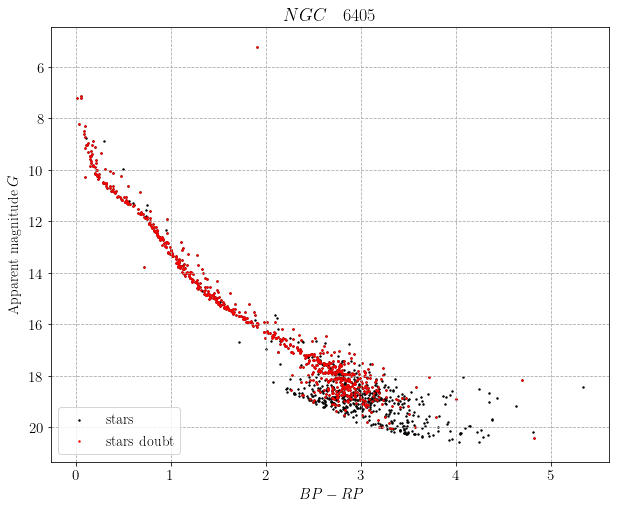

In [723]:
plt.rcParams.update({'font.size': 15})
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('text.latex', preamble=r'\usepackage[utf8]{inputenc}')
plt.rc('text.latex', preamble=r'\usepackage[russian]{babel}')

fig, ax = plt.subplots(figsize=(10,8))

ax.scatter(cluster_data['bp_rp'],
            cluster_data['phot_g_mean_mag'],
            c='black', s=2, label='stars', zorder=1)


ax.scatter(stars['bp_rp'],
            stars['phot_g_mean_mag'],
            c='red', s=2, label='stars doubt', zorder=1)

ax.invert_yaxis()
ax.grid(c='#aaaaaa', ls='--')


ax.set_xlabel('$BP-RP$')
ax.set_ylabel('Apparent magnitude $G$', labelpad=8)

ax.tick_params(axis='both', which='major')
ax.legend(loc='lower left')

title  = CLUSTER.replace('_','\quad')
ax.set_title(f'${title}$')


In [724]:
stars.to_csv(STARS_DIRECTORY / f'{CLUSTER}_selected_2', sep=' ', index=False, na_rep='NULL')